# Covid 19 Laboration
### Data Exploration of Laboration datasets

---
# Uppgift 1 - uppvärmning covid-19 data

In [1]:
import pandas as pd
import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt

# setting up file variables
file_path = "Data/Folkhalsomyndigheten_Covid19.xlsx"
sheet = "Veckodata Riket"

# reading file to a dataframe
df = pd.read_excel(file_path, sheet_name = sheet)

df.head()


,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0.0,0,0.0
1,2020,7,0,0,0,1,0,0,0,0,0.0,0,0.0
2,2020,8,0,0,0,1,0,0,0,0,0.0,0,0.0
3,2020,9,13,0,0,14,0,0,0,0,0.0,0,0.0
4,2020,10,211,2,2,225,2,3,3,0,0.0,0,0.0


---
a) Initial data analysis

In [2]:
df.info() # datatypes are all numbers, not missing any values, looks good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   år                              142 non-null    int64  
 1   veckonummer                     142 non-null    int64  
 2   Antal_fall_vecka                142 non-null    int64  
 3   Antal_fall_100000inv_vecka      142 non-null    int64  
 4   Antal_fall_100000inv_14dagar    142 non-null    int64  
 5   Kum_antal_fall                  142 non-null    int64  
 6   Kum_fall_100000inv              142 non-null    int64  
 7   Antal_nyaintensivvårdade_vecka  142 non-null    int64  
 8   Kum_antal_intensivvårdade       142 non-null    int64  
 9   Antal_avlidna_vecka             142 non-null    int64  
 10  Antal_avlidna_milj_inv_vecka    142 non-null    float64
 11  Kum_antal_avlidna               142 non-null    int64  
 12  Kum_antal_avlidna_milj_inv      142 

---
b) add columns "år" and "veckonummer" to a column "vecka" in the following format: YYYYvW


In [3]:
# creating new column "Vecka" of strings from "år" and "veckonummer" separated by "v", and inserting it at position 0 of the dataframe
df.insert(0, "Vecka", df["år"].astype(str) + "v" + df["veckonummer"].astype(str)) # taking column values as string in order to get the correct datatype
df["Vecka"].head() # results in column with format YYYYvW

0     2020v6
1     2020v7
2     2020v8
3     2020v9
4    2020v10
Name: Vecka, dtype: object

---
Using both Seaborn and Plotly Express:  
c) Draw a line chart of deceased per week from 2020v6 until present  
d) Draw a line chart of new cases per week from 2020v6 until present  
e) Draw a line chart of deceased per week and new cases per week from 2020v6 until present  
f) Draw a line chart of cumulative amount cases from 2020v6 until present

## 2x2 plot using Seaborn

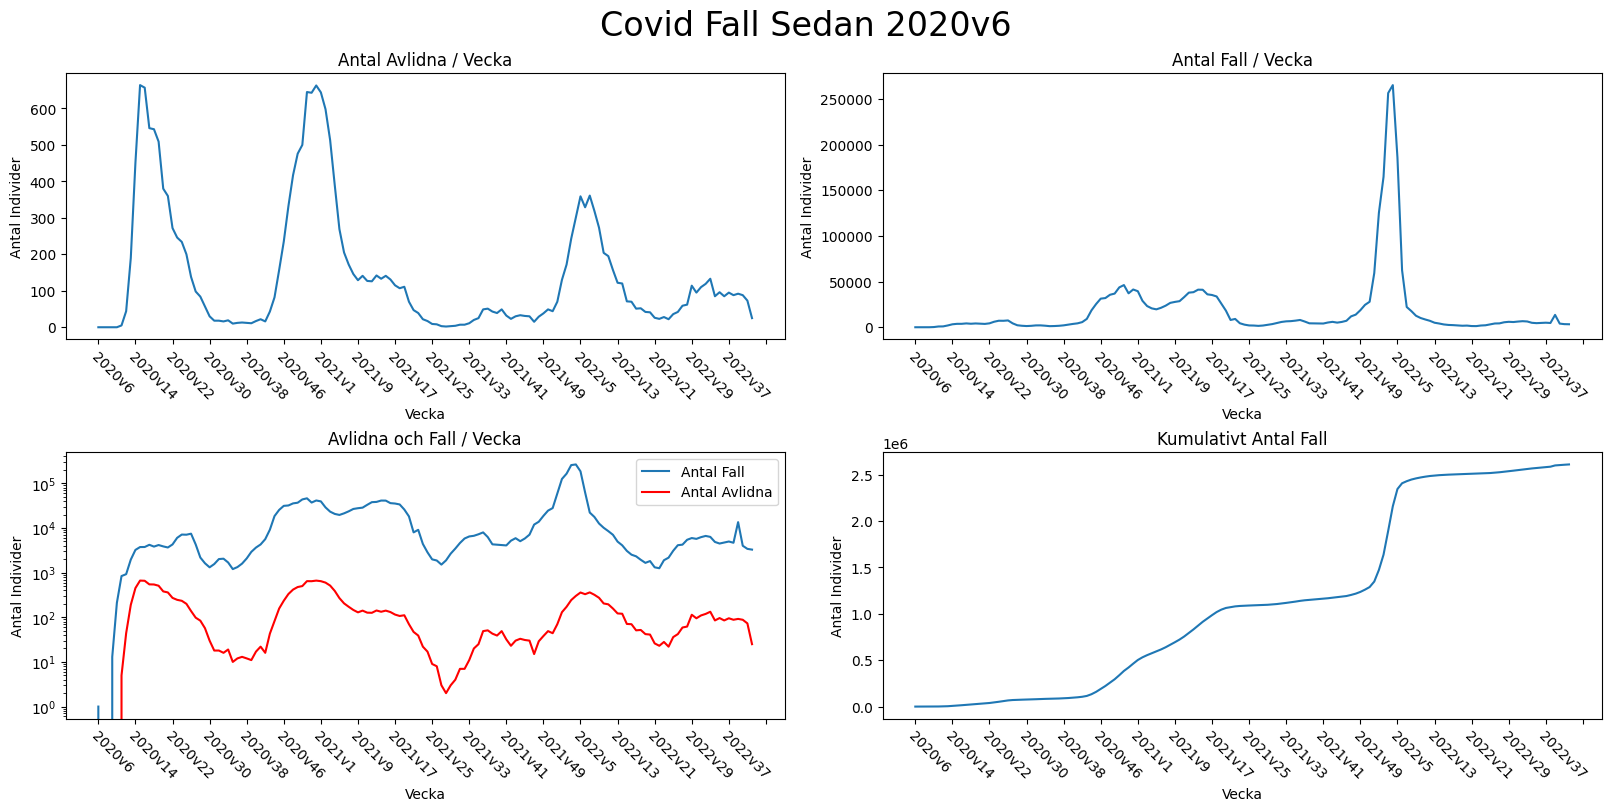

In [4]:
fig, axes = plt.subplots(2,2, figsize = (16, 8), constrained_layout = False)

titles = ["Antal Avlidna / Vecka", "Antal Fall / Vecka", "Avlidna och Fall / Vecka", "Kumulativt Antal Fall"]
y_lables = ["Antal Individer"] * 4

sns.lineplot(df, x = "Vecka", y = "Antal_avlidna_vecka", ax = axes[0, 0])
sns.lineplot(df, x = "Vecka", y = "Antal_fall_vecka", ax = axes[0, 1])
sns.lineplot(df, x = "Vecka", y = "Antal_fall_vecka", ax = axes[1, 0], label = "Antal Fall") # TODO: using log scale shows strange result on 2020v6 (0 cases)
sns.lineplot(df, x = "Vecka", y = "Antal_avlidna_vecka", ax = axes[1, 0], label = "Antal Avlidna", color = "red")
axes[1, 0].set_yscale('log')
sns.lineplot(df, x = "Vecka", y = "Kum_antal_fall", ax = axes[1, 1])

for ax, title, y_label in zip(axes.reshape(-1), titles, y_lables):
    ax.set_title(title)
    ax.set_ylabel(y_label)
    ax.xaxis.set_major_locator(plt.MaxNLocator(20)) # showing 20 tick labels
    ax.xaxis.set_tick_params(rotation=-45) # draws ticks at bottom of x axis with rotation
    plt.setp(ax.get_xticklabels(), ha="left", rotation_mode="anchor") # anchor left part of label to tick

fig.suptitle("Covid Fall Sedan 2020v6", fontsize = 24);

## Plotting with Plotly Express

In [5]:
# TODO: add titles and labels

In [6]:
px.line(df, x = "Vecka", y = "Antal_avlidna_vecka")

In [7]:
px.line(df, x = "Vecka", y = "Antal_fall_vecka")

In [8]:
px.line(df, x = "Vecka", y = ["Antal_avlidna_vecka", "Antal_fall_vecka"], log_y = True)

In [9]:
px.line(df, x = "Vecka", y = "Kum_antal_fall")


---
# Uppgift 2 - uppvärmning vaccindata

In [10]:
# setting up file variables
file_path = "Data/Folkhalsomyndigheten_Covid19_Vaccine.xlsx"
sheet = "Vaccinerade kommun och ålder"

# reading file to a dataframe
df = pd.read_excel(file_path, sheet_name = sheet)

df.head()

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.497936,0.431874,NaN,NaN
1,1,Stockholms län,114,Upplands Väsby,16-17,1203,839,755,NaN,NaN,0.697423,0.627598,NaN,NaN
2,1,Stockholms län,114,Upplands Väsby,18-29,6692,4887,4469,1959.0,NaN,0.730275,0.667812,0.292738,NaN
3,1,Stockholms län,114,Upplands Väsby,30-39,7332,5542,5240,2878.0,NaN,0.755865,0.714675,0.392526,NaN
4,1,Stockholms län,114,Upplands Väsby,40-49,6946,5592,5429,3719.0,NaN,0.805068,0.781601,0.535416,NaN


In [11]:
df.info() # note some missing values (for doses not yet distributed to certain age groups), and age ranges are not numbers
# nothing that needs to be changed right now, but important to take not of for later in case they need to be changed for a specific use

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Län                  2900 non-null   int64  
 1   Län_namn             2900 non-null   object 
 2   Kommun               2900 non-null   int64  
 3   Kommun_namn          2900 non-null   object 
 4   Ålder                2900 non-null   object 
 5   Befolkning           2900 non-null   int64  
 6   Antal minst 1 dos    2900 non-null   int64  
 7   Antal minst 2 doser  2900 non-null   int64  
 8   Antal 3 doser        2320 non-null   float64
 9   Antal 4 doser        870 non-null    float64
 10  Andel minst 1 dos    2900 non-null   float64
 11  Andel minst 2 doser  2900 non-null   float64
 12  Andel 3 doser        2320 non-null   float64
 13  Andel 4 doser        870 non-null    float64
dtypes: float64(6), int64(5), object(3)
memory usage: 317.3+ KB


---
a) How many counties are represented in the dataset?

In [12]:
counties = len(df["Län_namn"].unique()) # length (amount) unique strings in Län_namn
print(f"{counties} counties are represented in the dataset")

21 counties are represented in the dataset


In [13]:
df["Län_namn"].unique() # no duplicates with different spelling (typos) in the set at a manual overview

array(['Stockholms län', 'Uppsala län', 'Södermanlands län',
       'Östergötlands län', 'Jönköpings län', 'Kronobergs län',
       'Kalmar län', 'Gotlands län', 'Blekinge län', 'Skåne län',
       'Hallands län', 'Västra Götalands län', 'Värmlands län',
       'Örebro län', 'Västmanlands län', 'Dalarnas län', 'Gävleborgs län',
       'Västernorrlands län', 'Jämtlands län', 'Västerbottens län',
       'Norrbottens län'], dtype=object)

---
b) How many cities are represented in the dataset?

In [14]:
cities = len(df["Kommun_namn"].unique()) # length (amount) unique strings in Kommun_namn
print(f"{cities} cities are represented in the dataset")

290 cities are represented in the dataset


In [15]:
df["Kommun_namn"].unique() # can't spot any obvious duplicates with different spelling (typos) at a quick manual overview

array(['Upplands Väsby', 'Vallentuna', 'Österåker', 'Värmdö', 'Järfälla',
       'Ekerö', 'Huddinge', 'Botkyrka', 'Salem', 'Haninge', 'Tyresö',
       'Upplands-Bro', 'Nykvarn', 'Täby', 'Danderyd', 'Sollentuna',
       'Stockholm', 'Södertälje', 'Nacka', 'Sundbyberg', 'Solna',
       'Lidingö', 'Vaxholm', 'Norrtälje', 'Sigtuna', 'Nynäshamn', 'Håbo',
       'Älvkarleby', 'Knivsta', 'Heby', 'Tierp', 'Uppsala', 'Enköping',
       'Östhammar', 'Vingåker', 'Gnesta', 'Nyköping', 'Oxelösund', 'Flen',
       'Katrineholm', 'Eskilstuna', 'Strängnäs', 'Trosa', 'Ödeshög',
       'Ydre', 'Kinda', 'Boxholm', 'Åtvidaberg', 'Finspång',
       'Valdemarsvik', 'Linköping', 'Norrköping', 'Söderköping', 'Motala',
       'Vadstena', 'Mjölby', 'Aneby', 'Gnosjö', 'Mullsjö', 'Habo',
       'Gislaved', 'Vaggeryd', 'Jönköping', 'Nässjö', 'Värnamo', 'Sävsjö',
       'Vetlanda', 'Eksjö', 'Tranås', 'Uppvidinge', 'Lessebo', 'Tingsryd',
       'Alvesta', 'Älmhult', 'Markaryd', 'Växjö', 'Ljungby', 'Högsby',
       '

---
c) What size is the population represented in the dataset?

In [16]:
pop = df["Befolkning"].sum() # sum of all values under Befolkning
print(f"{pop:,} is the size of the population represented in the dataset")

9,092,790 is the size of the population represented in the dataset


---
d) Calculate the amount of children under the age of 18 there are in Sweden based on this dataset

In [17]:
amount_children_12_17 = df["Befolkning"][df["Ålder"] == "12-15"].sum() + df["Befolkning"][df["Ålder"] == "16-17"].sum()
print(f"{amount_children_12_17:,} children of age 12-17 according to this dataset")

745,370 children of age 12-17 according to this dataset


In [18]:
# assuming roughly equal distribution of children in ages 0-17
pop_per_age = amount_children_12_17 / 6
ages_0_17 = 18
pop_under_18 = pop_per_age * ages_0_17
print(f"Amount of children under the age of 18 should be roughly {round(pop_under_18):,}")

Amount of children under the age of 18 should be roughly 2,236,110


In [19]:
# reading in downloaded data on population of sweden under the age of 18 year 2021 according to SCB
# (source: https://www.statistikdatabasen.scb.se/pxweb/sv/ssd/START__BE__BE0101__BE0101A/FolkmangdNov/)
file_path = "Data/Sveriges_befolkning_under_18.xlsx"

df_under18 = pd.read_excel(file_path, header = 2)

df_under18.drop(df_under18.columns[0:3], axis = "columns", inplace = True) # dropping columns irrelevant for this comparison
df_under18 # lots of nan values to deal with

,2021
0,50261.0
1,47919.0
2,59092.0
3,55760.0
4,60536.0
...,...
79,NaN
80,NaN
81,NaN
82,NaN


In [20]:
df_under18.dropna(inplace = True) # removing nans
df_under18.info() # as expected, 36 non-nulls of float remaining (the 18 age groups 0-17 for boys and girls)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2021    36 non-null     float64
dtypes: float64(1)
memory usage: 576.0 bytes


In [21]:
actual_amount = df_under18["2021"].sum() # getting the sum to compare result with

In [22]:
diff = (pop_under_18 - actual_amount) / pop_under_18 # calculating difference
print(f"Difference between dataset estimation and actual numbers is {diff * 100:.1f}%") # a difference of ~2.5%
# this points to the result from the dataset, and population calculations from it being roughly accurate

Difference between dataset estimation and actual numbers is 2.5%


In [23]:
df["Befolkning"].mask((df["Ålder"] == "12-15") | (df["Ålder"] == "16-17")).sum() # wrong result TODO: have a look at this later

8347420.0

In [24]:
sum(df["Befolkning"].mask((df["Ålder"] == "12-15") | (df["Ålder"] == "16-17"))) # TODO: why does this return nan when the example above works?

nan

---
e) Draw a diagram showing the age distribution of Swedens population

In [25]:
# using df grouped by age to get the sum of all numeric values based on that group, and then resetting age back to its own column to use in plotting:
df_by_age_group = df.groupby(["Ålder"]).sum(numeric_only = True).reset_index()
px.bar(df_by_age_group, x = "Ålder", y = "Befolkning", title = "Åldersditribution av Sveriges Population")

---
f) Rita stapeldiagram för andel med minst 1 dos per län, andel två doser per län och andel tre doser per
län

In [26]:
sum_by_age_group = df_by_age_group.sum(numeric_only = True)
sum_by_age_group

Län                    3.836000e+04
Kommun                 4.008060e+06
Befolkning             9.092790e+06
Antal minst 1 dos      7.810376e+06
Antal minst 2 doser    7.627585e+06
Antal 3 doser          5.531250e+06
Antal 4 doser          1.354867e+06
Andel minst 1 dos      2.485531e+03
Andel minst 2 doser    2.434162e+03
Andel 3 doser          1.705387e+03
Andel 4 doser          7.396148e+02
dtype: float64

In [27]:
# df_andel_med_doser = pd.DataFrame(
#     {
#         "Doser": [1, 2, 3],
#         "Andel Invånare (%)": [
#             sum_by_age_group["Antal minst 1 dos"]
#             / sum_by_age_group["Befolkning"]
#             * 100,
#             sum_by_age_group["Antal minst 2 doser"]
#             / sum_by_age_group["Befolkning"]
#             * 100,
#             sum_by_age_group["Antal 3 doser"] / sum_by_age_group["Befolkning"] * 100,
#         ],
#     }
# )

# df_andel_med_doser


In [28]:
# px.bar(df_andel_med_doser, x = "Doser", y = "Andel Invånare (%)", title = "Andel invånare med minst 1, 2, 3 doser")

In [29]:
df_by_age_group.head(5)

,Ålder,Län,Kommun,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,12-15,3836,400806,503831,278405,255541,0.0,0.0,162.468208,151.029976,0.000000,0.0
1,16-17,3836,400806,241539,187077,175480,0.0,0.0,228.733824,216.427464,0.000000,0.0
2,18-29,3836,400806,1475950,1201569,1144897,573532.0,0.0,233.827624,223.924910,104.527222,0.0
3,30-39,3836,400806,1467590,1190083,1148376,689647.0,0.0,236.839589,229.919851,135.343053,0.0
4,40-49,3836,400806,1298156,1117660,1095826,791299.0,0.0,250.895222,246.856228,179.174449,0.0


In [30]:
df.head(1)

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.497936,0.431874,NaN,NaN


---
f) Rita stapeldiagram för andel med minst 1 dos per län, andel två doser per län och andel tre doser per
län

In [31]:
df.head()

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.497936,0.431874,NaN,NaN
1,1,Stockholms län,114,Upplands Väsby,16-17,1203,839,755,NaN,NaN,0.697423,0.627598,NaN,NaN
2,1,Stockholms län,114,Upplands Väsby,18-29,6692,4887,4469,1959.0,NaN,0.730275,0.667812,0.292738,NaN
3,1,Stockholms län,114,Upplands Väsby,30-39,7332,5542,5240,2878.0,NaN,0.755865,0.714675,0.392526,NaN
4,1,Stockholms län,114,Upplands Väsby,40-49,6946,5592,5429,3719.0,NaN,0.805068,0.781601,0.535416,NaN


In [32]:
df["Län_namn"].unique() # this is x

array(['Stockholms län', 'Uppsala län', 'Södermanlands län',
       'Östergötlands län', 'Jönköpings län', 'Kronobergs län',
       'Kalmar län', 'Gotlands län', 'Blekinge län', 'Skåne län',
       'Hallands län', 'Västra Götalands län', 'Värmlands län',
       'Örebro län', 'Västmanlands län', 'Dalarnas län', 'Gävleborgs län',
       'Västernorrlands län', 'Jämtlands län', 'Västerbottens län',
       'Norrbottens län'], dtype=object)

In [33]:
df.head()

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.497936,0.431874,NaN,NaN
1,1,Stockholms län,114,Upplands Väsby,16-17,1203,839,755,NaN,NaN,0.697423,0.627598,NaN,NaN
2,1,Stockholms län,114,Upplands Väsby,18-29,6692,4887,4469,1959.0,NaN,0.730275,0.667812,0.292738,NaN
3,1,Stockholms län,114,Upplands Väsby,30-39,7332,5542,5240,2878.0,NaN,0.755865,0.714675,0.392526,NaN
4,1,Stockholms län,114,Upplands Väsby,40-49,6946,5592,5429,3719.0,NaN,0.805068,0.781601,0.535416,NaN


In [34]:
r = df.groupby(["Andel minst 1 dos", "Andel minst 2 doser", "Andel 3 doser"]).sum(numeric_only = True)
r

Län  Kommun  Befolkning  \
Andel minst 1 dos Andel minst 2 doser Andel 3 doser                            
0.595181          0.528744            0.192840         1     127       14525   
0.609732          0.545998            0.191073         1     181       15392   
0.632980          0.583006            0.248626         1     181       15288   
0.633906          0.585055            0.253896         1     127       13797   
0.637923          0.592187            0.189138        12    1277        2099   
...                                                  ...     ...         ...   
1.000000          1.000000            0.979412        14    1438         340   
                                      0.984962         5     584         133   
                                      0.987730        23    2361         163   
                                      0.993421         5     561         152   
                                      1.000000       106   10712         452   

                                                     Antal minst 1 dos  \
Andel minst 1 dos Andel minst 2 doser Andel 3 doser                      
0.595181          0.528744            0.192840                    8645   
0.609732          0.545998            0.191073                    9385   
0.632980          0.583006            0.248626                    9677   
0.633906          0.585055            0.253896                    8746   
0.637923          0.592187            0.189138                    1339   
...                                                                ...   
1.000000          1.000000            0.979412                     340   
                                      0.984962                     133   
                                      0.987730                     163   
                                      0.993421                     152   
                                      1.000000                     452   

                                                     Antal minst 2 doser  \
Andel minst 1 dos Andel minst 2 doser Andel 3 doser                        
0.595181          0.528744            0.192840                      7680   
0.609732          0.545998            0.191073                      8404   
0.632980          0.583006            0.248626                      8913   
0.633906          0.585055            0.253896                      8072   
0.637923          0.592187            0.189138                      1243   
...                                                                  ...   
1.000000          1.000000            0.979412                       340   
                                      0.984962                       133   
                                      0.987730                       163   
                                      0.993421                       152   
                                      1.000000                       452   

                                                     Antal 3 doser  \
Andel minst 1 dos Andel minst 2 doser Andel 3 doser                  
0.595181          0.528744            0.192840              2801.0   
0.609732          0.545998            0.191073              2941.0   
0.632980          0.583006            0.248626              3801.0   
0.633906          0.585055            0.253896              3503.0   
0.637923          0.592187            0.189138               397.0   
...                                                            ...   
1.000000          1.000000            0.979412               333.0   
                                      0.984962               131.0   
                                      0.987730               161.0   
                                      0.993421               151.0   
                                      1.000000               452.0   

                                                     Antal 4 doser  \
Andel minst 1 dos Andel minst 2 doser Andel 3 doser                  
0.595181 

In [35]:
df.head()

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.497936,0.431874,NaN,NaN
1,1,Stockholms län,114,Upplands Väsby,16-17,1203,839,755,NaN,NaN,0.697423,0.627598,NaN,NaN
2,1,Stockholms län,114,Upplands Väsby,18-29,6692,4887,4469,1959.0,NaN,0.730275,0.667812,0.292738,NaN
3,1,Stockholms län,114,Upplands Väsby,30-39,7332,5542,5240,2878.0,NaN,0.755865,0.714675,0.392526,NaN
4,1,Stockholms län,114,Upplands Väsby,40-49,6946,5592,5429,3719.0,NaN,0.805068,0.781601,0.535416,NaN


In [36]:
län_grp = df.groupby(["Län_namn"])

In [37]:
län_grp.get_group("Stockholms län")

,Län,Län_namn,Kommun,Kommun_namn,Ålder,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,1,Stockholms län,114,Upplands Väsby,12-15,2422,1206,1046,NaN,NaN,0.497936,0.431874,NaN,NaN
1,1,Stockholms län,114,Upplands Väsby,16-17,1203,839,755,NaN,NaN,0.697423,0.627598,NaN,NaN
2,1,Stockholms län,114,Upplands Väsby,18-29,6692,4887,4469,1959.0,NaN,0.730275,0.667812,0.292738,NaN
3,1,Stockholms län,114,Upplands Väsby,30-39,7332,5542,5240,2878.0,NaN,0.755865,0.714675,0.392526,NaN
4,1,Stockholms län,114,Upplands Väsby,40-49,6946,5592,5429,3719.0,NaN,0.805068,0.781601,0.535416,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,1,Stockholms län,192,Nynäshamn,50-59,4135,3706,3631,3019.0,NaN,0.896252,0.878114,0.730109,NaN
256,1,Stockholms län,192,Nynäshamn,60-69,3341,3088,3043,2765.0,NaN,0.924274,0.910805,0.827597,NaN
257,1,Stockholms län,192,Nynäshamn,70-79,3311,3163,3125,2973.0,2390.0,0.955301,0.943824,0.897916,0.721836
258,1,Stockholms län,192,Nynäshamn,80-89,1530,1488,1475,1425.0,1224.0,0.972549,0.964052,0.931373,0.800000


In [38]:
a1 = län_grp["Antal minst 1 dos"].sum() / län_grp["Befolkning"].sum()
a1.head()


Län_namn
Blekinge län      0.879227
Dalarnas län      0.878389
Gotlands län      0.904699
Gävleborgs län    0.873811
Hallands län      0.876481
dtype: float64

In [39]:
a2 = län_grp["Antal minst 2 doser"].sum() / län_grp["Befolkning"].sum()
a2.head()

Län_namn
Blekinge län      0.866501
Dalarnas län      0.864858
Gotlands län      0.888844
Gävleborgs län    0.853503
Hallands län      0.863581
dtype: float64

In [40]:
a3 = län_grp["Antal 3 doser"].sum() / län_grp["Befolkning"].sum()
a3.head()

Län_namn
Blekinge län      0.662176
Dalarnas län      0.651774
Gotlands län      0.693995
Gävleborgs län    0.632934
Hallands län      0.649378
dtype: float64

In [41]:
a4 = län_grp["Antal 4 doser"].sum() / län_grp["Befolkning"].sum()
a4.head()

Län_namn
Blekinge län      0.179857
Dalarnas län      0.194291
Gotlands län      0.201858
Gävleborgs län    0.180964
Hallands län      0.171083
dtype: float64

In [42]:
f = pd.DataFrame()
f["Minst 1 dos"] = a1
f["Minst 2 doser"] = a2
f["Minst 3 doser"] = a3
f["Minst 4 doser"] = a4
f.head()

,Minst 1 dos,Minst 2 doser,Minst 3 doser,Minst 4 doser
Län_namn,,,,
Blekinge län,0.879227,0.866501,0.662176,0.179857
Dalarnas län,0.878389,0.864858,0.651774,0.194291
Gotlands län,0.904699,0.888844,0.693995,0.201858
Gävleborgs län,0.873811,0.853503,0.632934,0.180964
Hallands län,0.876481,0.863581,0.649378,0.171083


In [43]:
px.bar(f)

In [44]:
px.bar(f, barmode = "group")

In [45]:
v = pd.DataFrame()
v[1] = [a1[1], a2[1], a3[1], a4[1]]
v

,1
0,0.878389
1,0.864858
2,0.651774
3,0.194291


In [46]:
a = df.groupby(["Län_namn"]).sum(numeric_only = True)
px.bar(df, x = "Län_namn", y = ["Andel minst 1 dos", "Andel minst 2 doser", "Andel 3 doser"])

In [47]:
df.groupby(["Län_namn"]).sum(numeric_only = True)

,Län,Kommun,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
Län_namn,,,,,,,,,,,
Blekinge län,500,53860,139327,122500,120727,92259.0,25059.0,42.822781,42.099632,29.796100,12.407694
Dalarnas län,3000,308210,252075,221420,218009,164296.0,48976.0,128.333151,126.201528,89.212802,39.655117
Gotlands län,90,9800,53924,48785,47930,37423.0,10885.0,8.903401,8.734112,6.224683,2.633847
Gävleborgs län,2100,215290,252216,220389,215267,159636.0,45642.0,85.168444,82.888678,57.957835,25.300869
Hallands län,780,82250,295663,259143,255329,191997.0,50583.0,51.554289,50.652912,35.961010,15.476443
Jämtlands län,1840,186180,115398,102236,100525,73332.0,19952.0,68.874393,67.517263,46.276112,19.897613
Jönköpings län,780,86200,317355,274960,270266,199488.0,51399.0,111.805788,110.072274,77.968563,33.699484
Kalmar län,960,103730,216763,190931,188522,147192.0,42395.0,102.155113,100.735698,72.362555,30.979065
Kronobergs län,560,61410,175503,149141,146494,103745.0,27664.0,65.998583,64.815791,44.520603,19.655853


---
f) Tag Västra Götalands län och Stockholms län och rita diagram över andelen vaccinerade med minst 1 dos,
två doser, tre doser och fyra doser

In [48]:
# sum by län
b = df.groupby(["Län_namn"]).sum(numeric_only = True).reset_index()
b

,Län_namn,Län,Kommun,Befolkning,Antal minst 1 dos,Antal minst 2 doser,Antal 3 doser,Antal 4 doser,Andel minst 1 dos,Andel minst 2 doser,Andel 3 doser,Andel 4 doser
0,Blekinge län,500,53860,139327,122500,120727,92259.0,25059.0,42.822781,42.099632,29.796100,12.407694
1,Dalarnas län,3000,308210,252075,221420,218009,164296.0,48976.0,128.333151,126.201528,89.212802,39.655117
2,Gotlands län,90,9800,53924,48785,47930,37423.0,10885.0,8.903401,8.734112,6.224683,2.633847
3,Gävleborgs län,2100,215290,252216,220389,215267,159636.0,45642.0,85.168444,82.888678,57.957835,25.300869
4,Hallands län,780,82250,295663,259143,255329,191997.0,50583.0,51.554289,50.652912,35.961010,15.476443
5,Jämtlands län,1840,186180,115398,102236,100525,73332.0,19952.0,68.874393,67.517263,46.276112,19.897613
6,Jönköpings län,780,86200,317355,274960,270266,199488.0,51399.0,111.805788,110.072274,77.968563,33.699484
7,Kalmar län,960,103730,216763,190931,188522,147192.0,42395.0,102.155113,100.735698,72.362555,30.979065
8,Kronobergs län,560,61410,175503,149141,146494,103745.0,27664.0,65.998583,64.815791,44.520603,19.655853
9,Norrbottens län,3500,355800,220199,198514,195919,149293.0,40385.0,121.847453,119.752759,84.318602,35.622020


---
f) Rita stapeldiagram för andel med minst 1 dos per län, andel två doser per län och andel tre doser per
län

In [49]:
län_grp = df.groupby(["Län_namn"])

In [56]:
län_grp["Antal minst 1 dos"].sum() / län_grp["Befolkning"].sum()

Län_namn
Blekinge län            0.879227
Dalarnas län            0.878389
Gotlands län            0.904699
Gävleborgs län          0.873811
Hallands län            0.876481
Jämtlands län           0.885943
Jönköpings län          0.866411
Kalmar län              0.880828
Kronobergs län          0.849792
Norrbottens län         0.901521
Skåne län               0.829346
Stockholms län          0.831199
Södermanlands län       0.868316
Uppsala län             0.895379
Värmlands län           0.907242
Västerbottens län       0.917823
Västernorrlands län     0.891297
Västmanlands län        0.861019
Västra Götalands län    0.855077
Örebro län              0.875919
Östergötlands län       0.883365
dtype: float64

In [53]:
px.bar(län_grp, x = "Andel minst 1 dos")

c:\Users\Andre\.virtualenvs\Databehandling-Andreas-Svensson-UkaTOGrF\lib\site-packages\plotly\express\_core.py:1306: FutureWarning:

In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.



ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of [0, 1] but received: Andel minst 1 dos